# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datetime as dt


# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

SHAPE:(Rows,Columns) & Column names

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

Duplicate & NaN check

In [8]:
df_data.duplicated().values.any()

False

In [9]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [10]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

New df with only missions that have price data 

In [11]:
df_priced_mission = df_data.dropna()
df_priced_mission.isna().sum()
df_priced_mission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


## Descriptive Statistics

In [12]:
df_data.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

In [13]:
df_data.describe()

,Unnamed: 0,Unnamed: 0.1
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
Org_data = df_data.Organisation.value_counts().head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


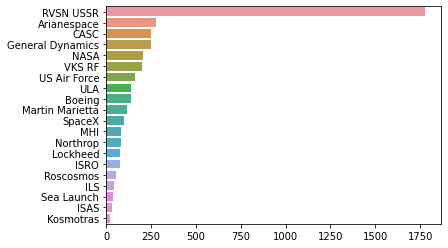

In [15]:
# fig = sns.countplot(df_data.Organisation.sort_values(ascending=False).head(20))

sns.barplot(Org_data.values, Org_data.index)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [16]:
rocket_state = df_data.Rocket_Status.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


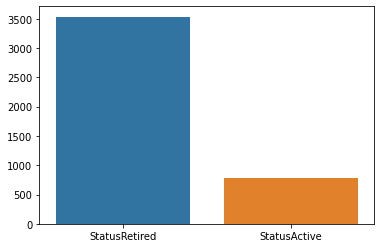

In [17]:
sns.barplot(rocket_state.index, rocket_state.values)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
mission_stat = df_data.Mission_Status.value_counts()

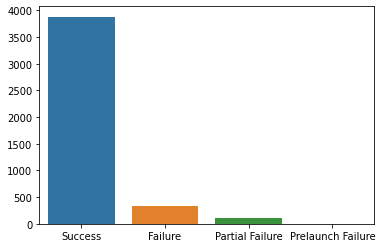

In [19]:
sns.barplot(x= mission_stat.index, y= mission_stat.values)

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

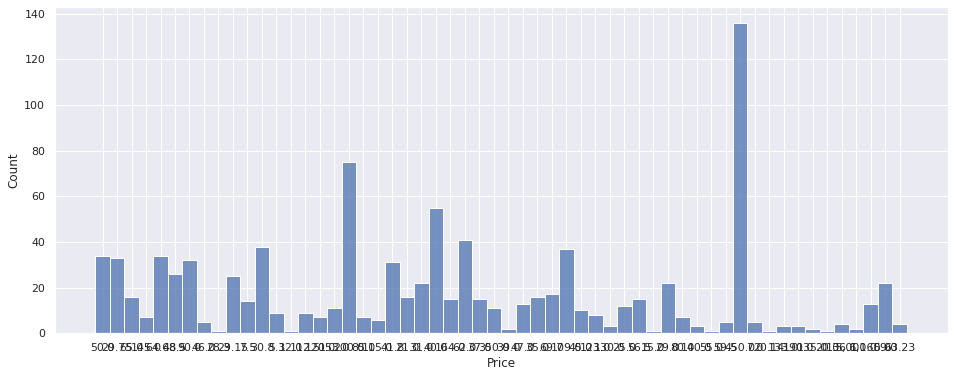

In [20]:
sns.set(rc={"figure.figsize":(16, 6)})
sns.histplot(df_priced_mission, x='Price', bins=10)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [21]:
countries.get("KOR")
# # a.split(',')[-1].strip(" ")

Country(name='Korea, Republic of', alpha2='KR', alpha3='KOR', numeric='410', apolitical_name='Korea, Republic of')

In [22]:
country = [a.split(',')[-1].strip(" ") for a in df_data.Location]

iran = ['Shahrud Missile Test Site', 'Iran']
usa = ['New Mexico', 'Pacific Missile Range Facility', 'Pacific Ocean', 'Gran Canaria']
china = ['Yellow Sea']
russia = ['Barents Sea', 'Russia', 'Kazakhstan']
nkorea = ['North Korea']
skorea = ['South Korea']

for a in range(len(country)): 
  if country[a] in iran: 
    country[a] = 'Iran, Islamic Republic of'
  elif country[a] in usa: 
    country[a] = 'USA'
  elif country[a] in china: 
    country[a] = 'China'
  elif country[a] in russia: 
    country[a] = 'Russian Federation'
  elif country[a] in nkorea: 
    country[a] = "Korea, Democratic People's Republic of"
  elif country[a] in skorea: 
    country[a] = 'Korea, Republic of'


country_alpha = [countries.get(a).alpha3 for a in country]

df_data['Country'] = country
df_data["ISO"] = country_alpha

In [23]:
countries_df=df_data.groupby(['ISO', 'Country'], as_index=False).agg({'Detail': pd.Series.count})
countries_df.sort_values(by='Detail', ascending = False, inplace=True)

countries_df.head(5)

,ISO,Country,Detail
12,RUS,Russian Federation,2099
13,USA,USA,1387
3,FRA,France,303
2,CHN,China,269
7,JPN,Japan,126


In [24]:
launch_map = px.choropleth(countries_df, locations=countries_df["ISO"], locationmode= 'ISO-3',
                           color="Detail", color_continuous_scale ='armyrose', 
                           hover_name = 'Detail', title = "Countrywise distribution",
                           ) 
launch_map.show()

In [25]:
df_data["Country"].unique()

array(['USA', 'China', 'Russian Federation', 'Japan', 'Israel',
       'New Zealand', 'Iran, Islamic Republic of', 'France', 'India',
       "Korea, Democratic People's Republic of", 'Korea, Republic of',
       'Brazil', 'Kenya', 'Australia'], dtype=object)

# Use a Choropleth Map to Show the Number of Failures by Country


In [26]:
status_df = df_data.groupby(['ISO', 'Mission_Status', 'Country' ], as_index=False).agg({'Location': pd.Series.count})
status_df.sort_values(by='Location', ascending = False, inplace=True)
failure_df = status_df.loc[status_df['Mission_Status'] == 'Failure']

failure_df.head(5)

,ISO,Mission_Status,Country,Location
28,RUS,Failure,Russian Federation,135
32,USA,Failure,USA,132
4,CHN,Failure,China,19
7,FRA,Failure,France,13
18,JPN,Failure,Japan,10


In [27]:
fig = px.choropleth(data_frame= failure_df, locations= 'ISO', locationmode="ISO-3", title="Failures by Nation",
                    color="Location", color_continuous_scale ='armyrose')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [28]:
fig=px.sunburst(df_data, path=['Country','Organisation','Mission_Status'])
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
df_priced_mission = df_data.dropna()
df_priced_mission["Price"] = df_priced_mission["Price"].str.replace(",","" )
df_priced_mission['Price'] = df_priced_mission['Price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# org_df=df_priced_mission.groupby(['Organisation', 'Country'], as_index=False).agg({'Detail': pd.Series.count})
# df_priced_mission["Price"] = df_priced_mission["Price"].str.replace(",","" )
# df_priced_mission['Price'] = df_priced_mission['Price'].astype(float)

# org_df=df_priced_mission.groupby(['Organisation', 'Country'], as_index=False)['Price'].sum().reset_index()
# # org_df.sort_values(by='Detail', ascending = False, inplace=True)

# # org_df["Price"] = org_df["Price"].str.replace(",","" )
# # org_df['Price'] = org_df['Price'].astype(float)
# org_df.sort_values(by='Price', ascending = False, inplace=True)

# org_df.head()

In [31]:


org_df = df_priced_mission.groupby('Organisation').agg({'Organisation':'size', 'Price':'sum'})
#set new ordering of columns
# org_df = org_df.reindex_axis(['Organisation','Price','Price'], axis=1)
#reset index
org_df = org_df.rename_axis(None).reset_index()
#set new column names
org_df.columns = ['Organisation','No. of Launches','Total Money Spent']
org_df.sort_values(by='Total Money Spent', ascending = False, inplace=True)

org_df.head(10)


,Organisation,No. of Launches,Total Money Spent
14,NASA,149,"76,280.00"
0,Arianespace,96,"16,345.00"
21,ULA,98,"14,798.00"
16,RVSN USSR,2,"10,000.00"
2,CASC,158,"6,340.26"
20,SpaceX,99,"5,444.00"
15,Northrop,83,"3,930.00"
12,MHI,37,"3,532.50"
8,ISRO,67,"2,177.00"
22,US Air Force,26,"1,550.92"


In [32]:
# fig = px.bar(df_priced_mission, x='Organisation', y='Price')
fig = px.bar(org_df, x='Organisation', y='Total Money Spent', title="Organisation vs Price(in Millions USD)")
fig.show()

In [33]:

# import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots

# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# plot a scatter chart by specifying the x and y values
# Use add_trace function to specify secondary_y axes.
fig.add_trace(
	go.Bar(x=org_df['Organisation'], y=org_df['Total Money Spent'], name="Money Spent"),
	secondary_y=False)

# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
	go.Scatter(x=org_df['Organisation'], y=org_df['No. of Launches'], name="Number of Launches"),
	secondary_y=True,)

# Adding title text to the figure
fig.update_layout(
	title_text="Analysis of Money Spent and Number of launches"
)


# Naming x-axis
fig.update_xaxes(title_text="Organisation")

# # Naming y-axes
fig.update_yaxes(title_text="<b>Money Spent</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Laucnches made</b>", secondary_y=True)



# Analyse the Amount of Money Spent by Organisation per Launch

In [34]:
per_launch_df = df_priced_mission.groupby('Organisation').agg({'Organisation':'size', 'Price':'mean'})

per_launch_df = per_launch_df.rename_axis(None).reset_index()
#set new column names
per_launch_df.columns = ['Organisation','No. of Launches', 'Cost Per Launch']
per_launch_df.sort_values(by='Cost Per Launch', ascending = False, inplace=True)

per_launch_df.head(5)

,Organisation,No. of Launches,Cost Per Launch
16,RVSN USSR,2,"5,000.00"
14,NASA,149,511.95
1,Boeing,7,177.29
0,Arianespace,96,170.26
21,ULA,98,151.00


In [35]:
fig = px.bar(per_launch_df, x='Organisation', y='Cost Per Launch', title="Organisation vs Price(in Millions USD)")
fig.show()

# Chart the Number of Launches per Year

In [36]:
df_data['Year'] = df_data["Date"].str[12:17].astype(int)

In [37]:
year_data = df_data.groupby('Year').agg({'Year': 'size'})
year_data.columns = [ 'No. of Launches']
year_data.sort_values(by='Year')

year_data.head(5)


,No. of Launches
Year,
1957,3
1958,28
1959,20
1960,39
1961,52


In [38]:
fig = px.scatter(year_data, x=year_data.index, y="No. of Launches")
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [39]:
df_data['Month'] = df_data["Date"].str[4:7]

In [40]:
df_data['Month'] = pd.to_datetime(df_data['Month'], format= "%b")

In [41]:
month_data = df_data.groupby('Month').agg({'Month': 'size'})
month_data.columns = [ 'No. of Launches']
month_data.sort_values(by='Month')
month_data.head(5)


,No. of Launches
Month,
1900-01-01,268
1900-02-01,336
1900-03-01,353
1900-04-01,383
1900-05-01,326


In [42]:
rolling_month_df = month_data[ 'No. of Launches'].rolling(window=2).mean()
month_data["Rolling Mean"] = rolling_month_df

In [43]:
fig = px.bar(month_data, x=month_data.index, y="No. of Launches")
fig.show()

In [44]:

# import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots

# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# plot a scatter chart by specifying the x and y values
# Use add_trace function to specify secondary_y axes.
fig.add_trace(
	go.Bar(x=month_data.index, y=month_data['No. of Launches'], name="No. of Launches"),
	secondary_y=False)

# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
	go.Scatter(x=month_data.index, y=month_data['Rolling Mean'], name="Rolling Mean"),
	secondary_y=True,)

# Adding title text to the figure
fig.update_layout(
	title_text="Analysis of Number of launches"
)


# Naming x-axis
fig.update_xaxes(title_text="Month")

# # Naming y-axes
fig.update_yaxes(title_text="<b>Laucnches made</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Rolling Mean</b>", secondary_y=True)



# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

Looks like December is favored the most for space missions follwed by June. 

Guess, Everyone's lazy on January and the year beginning is the least preferred for launches. 

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [45]:
df_priced_mission['Year'] = df_priced_mission["Date"].str[12:17].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
yearly_price = df_priced_mission.groupby('Year').agg({'Price': 'mean'})
yearly_price.columns = [ 'Average Price']
yearly_price.sort_values(by='Year')

yearly_price.head(5)

,Average Price
Year,
1964,63.23
1965,63.23
1966,59.00
1967,196.62
1968,279.20


In [47]:
fig = px.line(yearly_price, x= yearly_price.index, y="Average Price")
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [48]:
org_yearly = df_data.groupby(['Organisation', 'Year'], as_index=False).agg({'Detail': 'size'})
org_yearly.columns = ['Organisation', 'Year', 'No. of Launches']
org_yearly.sort_values(by='Year')


,Organisation,Year,No. of Launches
623,US Navy,1957,1
497,RVSN USSR,1957,2
598,US Air Force,1958,2
624,US Navy,1958,12
3,AMBA,1958,7
...,...,...,...
539,Rocket Lab,2020,3
235,ISA,2020,1
161,ExPace,2020,3
48,Arianespace,2020,4


In [49]:
top_10_org = org_df.nlargest(10, "No. of Launches")
top_10_org

top_launch = org_yearly[org_yearly['Organisation'].isin(top_10_org['Organisation'])]
top_launch.head()

,Organisation,Year,No. of Launches
12,Arianespace,1984,3
13,Arianespace,1985,4
14,Arianespace,1986,3
15,Arianespace,1987,2
16,Arianespace,1988,6


In [50]:
fig=px.line(top_launch, x='Year', y='No. of Launches', color='Organisation', )
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [51]:
cold_war_df = df_data[df_data['ISO'].isin(['USA','RUS']) & (df_data['Year'] < 1992)]
cold_war_df.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,Month
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Russian Federation,RUS,1991,1900-12-01
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russian Federation,RUS,1991,1900-12-01
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,1900-12-01
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,1991,1900-11-01
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russian Federation,RUS,1991,1900-11-01


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [52]:
country_share = cold_war_df.groupby('ISO').agg({'ISO':'size'})
country_share.columns = ["No. of Launches"]
country_share.head()

,No. of Launches
ISO,
RUS,1770
USA,662


In [53]:
fig = px.pie(country_share, names=country_share.index, values="No. of Launches")
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [54]:
cold_launch_yearly = cold_war_df.groupby(['Country', 'Year'], as_index=False).agg({'Detail':'size'})
cold_launch_yearly.columns = ['Country','Year','No. of Launches']
cold_launch_yearly.head()

,Country,Year,No. of Launches
0,Russian Federation,1957,2
1,Russian Federation,1958,5
2,Russian Federation,1959,4
3,Russian Federation,1960,9
4,Russian Federation,1961,9


In [55]:
fig = px.line(cold_launch_yearly, x='Year', y='No. of Launches', color='Country')
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [56]:
cold_failure_df = cold_war_df[cold_war_df['Mission_Status'] == 'Failure']

In [57]:
cold_flaunch_yearly = cold_failure_df.groupby(['Country', 'Year'], as_index=False).agg({'Detail':'size'})
cold_flaunch_yearly.columns = ['Country','Year','No. of failures']
cold_flaunch_yearly.head()

,Country,Year,No. of failures
0,Russian Federation,1958,4
1,Russian Federation,1959,1
2,Russian Federation,1960,6
3,Russian Federation,1961,4
4,Russian Federation,1962,7


In [58]:
fig = px.line(cold_flaunch_yearly, x='Year', y='No. of failures', color='Country')
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [59]:
print(cold_launch_yearly.columns)
cold_flaunch_yearly.columns

Index(['Country', 'Year', 'No. of Launches'], dtype='object')


Index(['Country', 'Year', 'No. of failures'], dtype='object')

In [60]:
cold_launch = cold_flaunch_yearly.merge(cold_launch_yearly, how='left', on=['Country', 'Year'])

cold_launch['Percent_Fail'] = 100 * cold_launch['No. of failures'] / cold_launch['No. of Launches']

In [61]:
fig = px.line(cold_launch, x='Year', y='Percent_Fail', color='Country')
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
total_launch = df_data.groupby(['Country','Year'], as_index=False).agg({'Detail': 'size'})
total_launch.columns=['Country', 'Year', 'Launches']


In [79]:
total_launch['Launches till date'] = total_launch[['Country','Launches']].groupby('Country').cumsum()
total_launch.head(10)

,Country,Year,Launches,Launches till date
0,Australia,1967,1,1
1,Australia,1968,1,2
2,Australia,1969,1,3
3,Australia,1970,2,5
4,Australia,1971,1,6
5,Brazil,1997,1,1
6,Brazil,1999,1,2
7,Brazil,2003,1,3
8,China,1969,1,1
9,China,1970,1,2


In [86]:
max_launch_yearly = total_launch[['Country','Year','Launches till date']].groupby('Year').max()
max_launch_yearly.tail()

,Country,Launches
Year,,
2016,USA,27
2017,USA,30
2018,USA,39
2019,USA,34
2020,USA,22


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [94]:
total_launch_org = df_data.groupby(['Organisation','Year'], as_index=False).agg({'Detail': 'size'})
total_launch_org.columns=['Organisation', 'Year', 'Launches']
total_launch_org['Launches till date'] = total_launch_org[['Organisation','Launches']].groupby('Organisation').cumsum()


In [103]:
max_launch_yearly_org = total_launch_org[['Organisation','Year','Launches']].groupby('Year', as_index=False).max()
max_launch_yearly_org.Year.astype(int)

max_launch_yearly_org.head()

,Year,Organisation,Launches
0,1957,US Navy,2
1,1958,US Navy,12
2,1959,US Navy,10
3,1960,US Air Force,21
4,1961,US Air Force,23


In [110]:
seventies = max_launch_yearly_org[ max_launch_yearly_org['Year'] > 1970] 
seventies.head(20)

,Year,Organisation,Launches
14,1971,US Air Force,93
15,1972,US Air Force,79
16,1973,US Air Force,84
17,1974,US Air Force,83
18,1975,US Air Force,89
19,1976,US Air Force,95
20,1977,US Air Force,97
21,1978,RVSN USSR,71
22,1979,US Air Force,36
23,1980,RVSN USSR,40
